# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import datahandler

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Constants

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)
data_loader.execute(clean=False, processed=True, enhanced=False)


Loading dataset:   0%|          | 0/2 [00:00<?, ?it/s]

Loading dataset: 100%|██████████| 2/2 [00:11<00:00,  5.87s/it]


# Methods

In [5]:
def plot_resources_per_triage(dataframe: pd.DataFrame):
    grouped_data = dataframe.groupby("triage_impression_during_call")["resource_type"].value_counts().unstack(fill_value=0)

    grouped_data.plot(kind="bar", stacked=True, figsize=(10, 6))

    plt.xticks(rotation=0)
    plt.xlabel("Triage Impressions")
    plt.ylabel("Total Occurrences")
    plt.title("Occurrences of resource tyoes for each triage impression")
    plt.legend(title="Resource Types")

    plt.show()


In [6]:
def plot_resources_per_triage_average(dataframe: pd.DataFrame):
    grouped_data = dataframe.groupby("triage_impression_during_call")["resource_type"].value_counts(normalize=True).unstack(fill_value=0) * 100

    grouped_data.plot(kind="bar", stacked=True, figsize=(10, 6))

    plt.xticks(rotation=0)
    plt.xlabel("Triage Impressions")
    plt.ylabel("Total Occurrences (percentage %)")
    plt.title("Occurrences of resource tyoes for each triage impression")
    plt.legend(title="Resource Types")

    plt.show()


# Main

In [7]:
dataframe = data_loader.processed_incidents_df.copy()

dataframe = data_preprocessor._remove_duplicates(dataframe)
dataframe = data_preprocessor._remove_incomplete_years(dataframe)
dataframe = data_preprocessor._remove_outside_region(dataframe)

dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 421678 entries, 5199 to 754810
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   triage_impression_during_call  421670 non-null  object        
 1   resource_id                    421678 non-null  object        
 2   resource_type                  421678 non-null  object        
 3   time_call_received             421678 non-null  datetime64[ns]
 4   time_call_processed            421678 non-null  datetime64[ns]
 5   time_ambulance_notified        421472 non-null  datetime64[ns]
 6   time_dispatch                  409579 non-null  datetime64[ns]
 7   time_arrival_scene             373982 non-null  datetime64[ns]
 8   time_departure_scene           313286 non-null  datetime64[ns]
 9   time_arrival_hospital          312748 non-null  datetime64[ns]
 10  time_available                 421655 non-null  datetime64[ns]
 11  gr

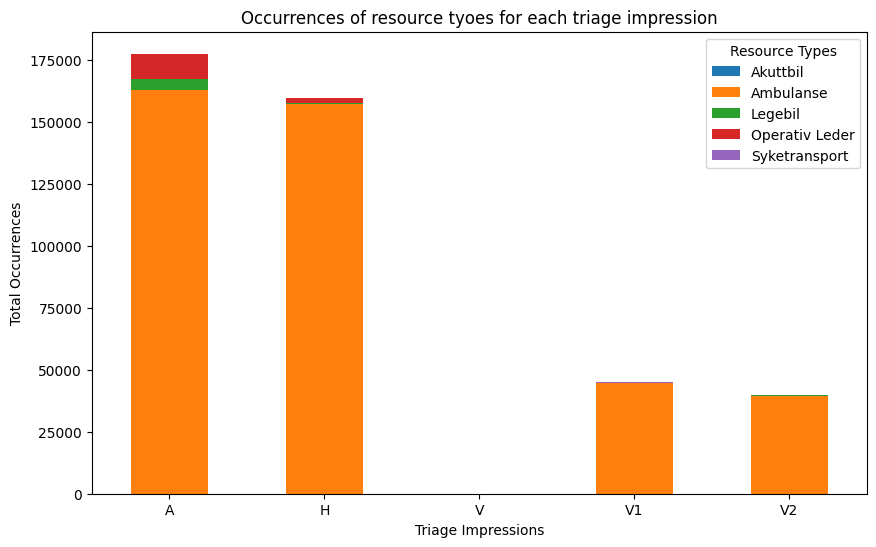

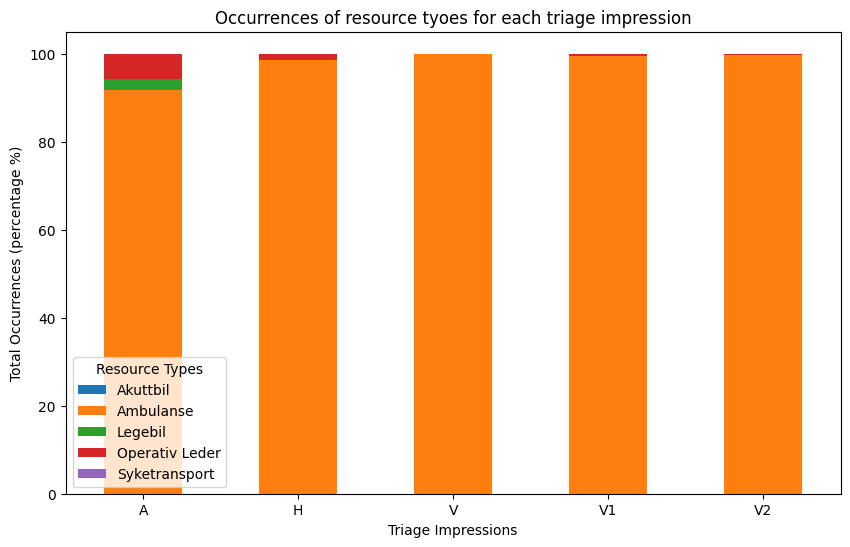

In [8]:
plot_resources_per_triage(dataframe)
plot_resources_per_triage_average(dataframe)


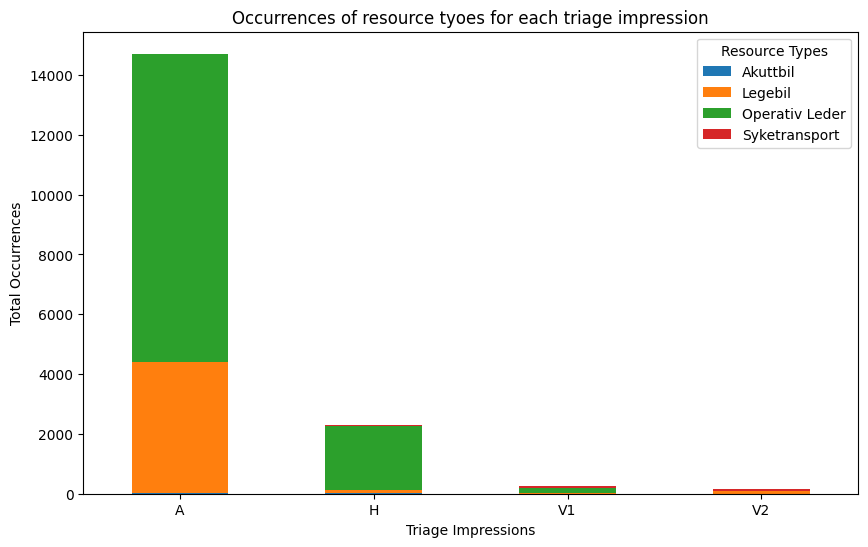

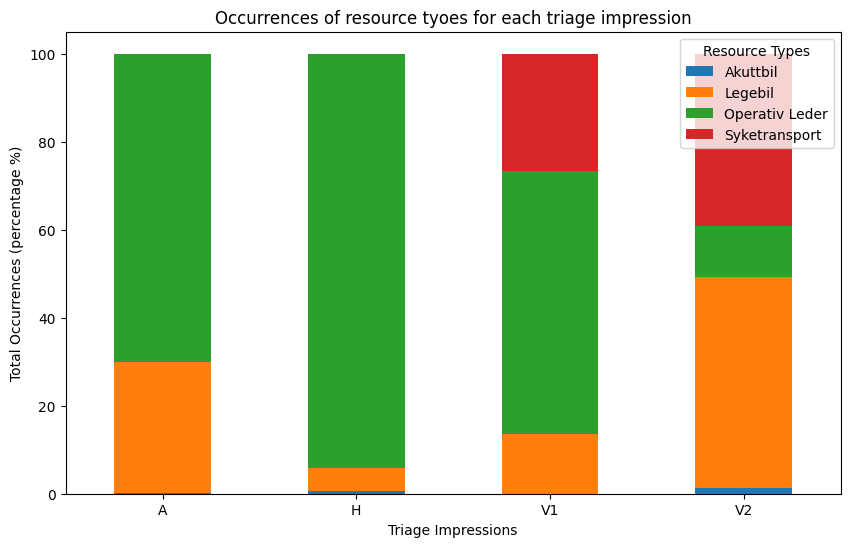

In [9]:
dataframe_test = dataframe[dataframe["resource_type"] != "Ambulanse"]

plot_resources_per_triage(dataframe_test)
plot_resources_per_triage_average(dataframe_test)
